# Isolation Forest

## 1. Introdução

Isolation Forest é um algoritmo eficiente de deteção de dados extremos, especialmente em datasets com alta dimensionalidade.
O algoritmo constroi uma random forest em cada árvore de decisão cresce aleatoriamente. Em cada nó ele seleciona uma feature aleatoriamente, depois seleciona um threshold aleatório para dividir o dataset em dois. O algoritmo divide o dataset gradualmente até que todas as instâncias estejam isoladas das outras instâncias. Outliers normalmente estão longe de outras instâncias, logo esses datapoints tendem a ser isolados em menos etapas que datapoints "normais". 

## 2. Dataset

A GENTE PODE USAR UM DATASET QUALQUER OU CRIAR UM E GERAR ALGUNS OUTLIERS MATEMATICAMENTE NELES (A GENTE PODE USAR ISSO PRA MOSTRAR UM EXEMPLO SIMPLIFICADO E DEPOIS ABORDAR UM DATASET GRANDE). VOU DEIXAR O ARTIFICIAL AQUI EMBAIXO.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd

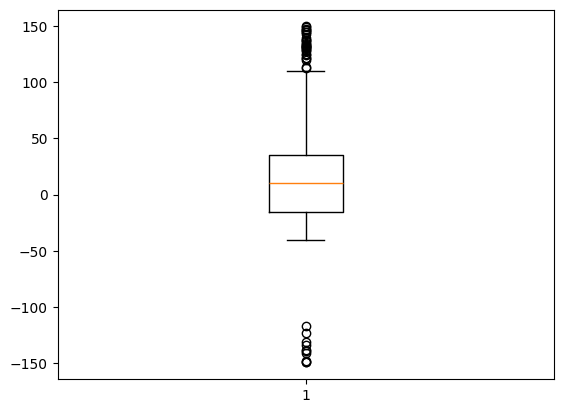

In [2]:


uniformSkewed = np.random.rand(10000) * 100 - 40
high_outliers = np.random.rand(38) * 50 + 100
low_outliers = np.random.rand(10) * -50 - 100

data = np.concatenate((uniformSkewed, high_outliers, low_outliers))
plt.boxplot(data)
plt.show()

In [3]:


n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

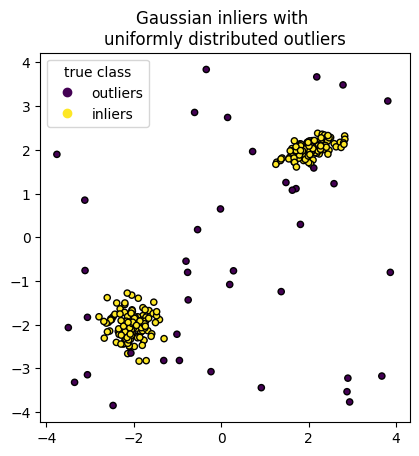

In [4]:


scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("Gaussian inliers with \nuniformly distributed outliers")
plt.show()

In [5]:


clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

IsolationForest(max_samples=100, random_state=0)

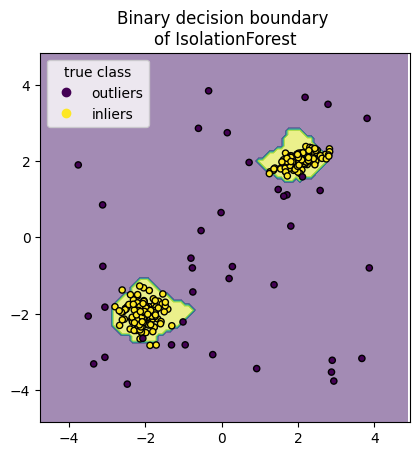

In [6]:


disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.show()

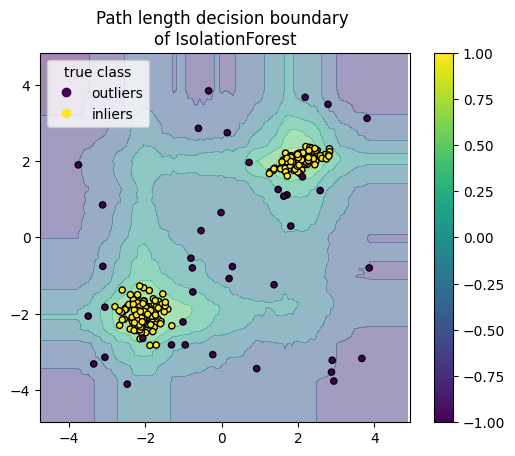

In [7]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

In [3]:


df = pd.read_csv("data/deputies_dataset.csv")

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014902 entries, 0 to 3014901
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   bugged_date                     3014902 non-null  int64  
 1   receipt_date                    3014902 non-null  object 
 2   deputy_id                       3014902 non-null  int64  
 3   political_party                 3014902 non-null  object 
 4   state_code                      3014902 non-null  object 
 5   deputy_name                     3014902 non-null  object 
 6   receipt_social_security_number  2493950 non-null  float64
 7   receipt_description             3014902 non-null  object 
 8   establishment_name              3014902 non-null  object 
 9   receipt_value                   3014902 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 230.0+ MB


In [9]:
df = df.dropna()

In [9]:


model = IsolationForest(contamination = 0.1, random_state = 42)

In [11]:
model.fit(df[['receipt_value']])

IsolationForest(contamination=0.1, random_state=42)

In [12]:
df['anomaly_scores'] = model.decision_function(df[['receipt_value']])

In [13]:
df['anomaly'] = model.predict(df[['receipt_value']])

In [14]:
df.head(100)

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,anomaly_scores,anomaly
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70,0.119592,1
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104,0.139103,1
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,0.155551,1
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,0.155551,1
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77,0.125048,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,2013-06-20 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,22000,-0.321825,-1
96,0,2013-07-18 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,15000,-0.297498,-1
97,0,2013-08-26 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,22000,-0.321825,-1
98,0,2013-09-23 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,22000,-0.321825,-1


In [15]:
counts = df[['anomaly']].value_counts()

counts

anomaly
 1         2244839
-1          249111
Name: count, dtype: int64

<BarContainer object of 2 artists>

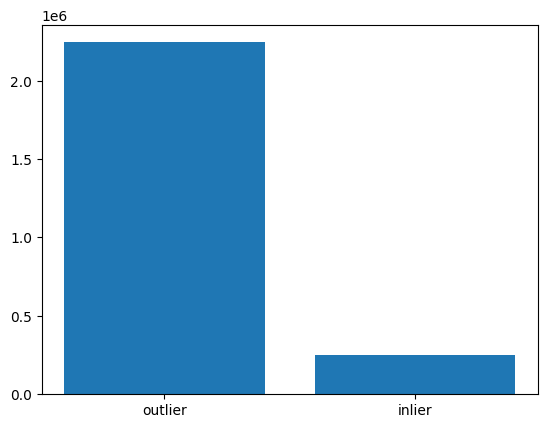

In [16]:
plt.bar(['outlier', 'inlier'], counts)

In [4]:
df_fut = pd.read_csv("data/team_statistics_brasileirao_2020.csv")

In [5]:
df_fut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   equipe           20 non-null     object 
 1   gols             20 non-null     int64  
 2   cartao_amarelo   20 non-null     int64  
 3   cartao_vermelho  20 non-null     int64  
 4   posse_de_bola    20 non-null     float64
 5   passes_certos    20 non-null     float64
 6   disputa_aerea    20 non-null     float64
 7   ranking          20 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.4+ KB


In [19]:
gols = df_fut[['gols']]
posse = df_fut[['posse_de_bola']]

In [20]:
gols

,gols
0,68
1,64
2,61
3,53
4,50
5,59
6,54
7,51
8,45
9,54


In [21]:
posse

,posse_de_bola
0,57.6
1,58.0
2,49.5
3,51.8
4,49.4
5,55.6
6,49.5
7,51.9
8,49.6
9,44.9


In [22]:
posse.var()

posse_de_bola    14.193132
dtype: float64

In [23]:
gols.var()

gols    127.923684
dtype: float64

In [24]:
len(gols)

20

In [25]:
len(posse)

20

In [26]:
np.corrcoef(gols.squeeze().values, posse.squeeze().values)

array([[1.        , 0.65120775],
       [0.65120775, 1.        ]])

In [27]:
model_fut = IsolationForest(contamination = 0.3, random_state = 42)

In [28]:
input = ['gols','posse_de_bola']

In [29]:
model_fut.fit(df_fut[input])

IsolationForest(contamination=0.3, random_state=42)

In [30]:
df_fut['anomaly_scores'] = model_fut.decision_function(df_fut[input])

In [31]:
df_fut['anomaly'] = model_fut.predict(df_fut[input])

In [4]:
import seaborn as sns

Text(0.5, 1.0, 'Inliers\n14 points')

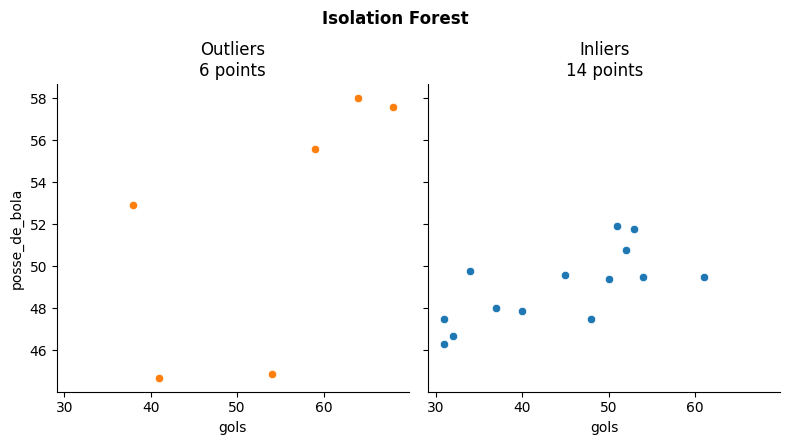

In [33]:
g = sns.FacetGrid(df_fut, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
g.map(sns.scatterplot, 'gols', 'posse_de_bola')
g.fig.suptitle('Isolation Forest', y=1.10, fontweight='bold')
axes = g.axes.flatten()
axes[0].set_title(f"Outliers\n{len(df_fut[df_fut['anomaly'] == -1])} points")
axes[1].set_title(f"Inliers\n{len(df_fut[df_fut['anomaly'] == 1])} points")

In [34]:
outliers = df_fut[df_fut['anomaly'] == -1]
inliers = df_fut[df_fut['anomaly'] == 1]

In [35]:
outliers

,equipe,gols,cartao_amarelo,cartao_vermelho,posse_de_bola,passes_certos,disputa_aerea,ranking,anomaly_scores,anomaly
0,1. Flamengo,68,88,3,57.6,86.4,15.4,6.79,-0.084731,-1
1,2. Atletico MG,64,62,3,58.0,86.1,13.5,6.74,-0.061753,-1
5,6. Sao Paulo,59,90,2,55.6,86.0,15.0,6.67,-0.027519,-1
9,10. Ceara,54,85,6,44.9,79.2,16.7,6.63,-0.034268,-1
10,11. Athletico Paranaense,38,79,3,52.9,84.8,13.3,6.60,-0.035585,-1
11,12. Goias,41,108,4,44.7,77.4,18.8,6.59,-0.035347,-1


In [36]:
inliers

,equipe,gols,cartao_amarelo,cartao_vermelho,posse_de_bola,passes_certos,disputa_aerea,ranking,anomaly_scores,anomaly
2,3. Internacional,61,89,9,49.5,80.8,17.2,6.69,0.017248,1
3,4. Gremio,53,69,8,51.8,85.2,15.2,6.69,0.081307,1
4,5. Red Bull Bragantino,50,74,4,49.4,81.2,14.1,6.68,0.113474,1
6,7. Fluminense,54,83,4,49.5,82.5,15.4,6.67,0.109098,1
7,8. Palmeiras,51,89,5,51.9,83.5,14.4,6.66,0.080655,1
8,9. Corinthians,45,81,8,49.6,81.1,18.0,6.63,0.090654,1
12,13. Santos FC,52,80,5,50.8,81.6,12.4,6.59,0.084425,1
13,14. Bahia,48,82,6,47.5,82.0,15.4,6.58,0.068383,1
14,15. Fortaleza,34,77,8,49.8,83.5,17.2,6.57,0.011794,1
15,16. Atletico GO,40,79,5,47.9,79.6,15.3,6.57,0.088198,1


In [38]:
features = ['gols','posse_de_bola', 'passes_certos', 'cartao_amarelo']

In [ ]:
np.corrcoef(df_fut[features])

In [40]:
model_fut_6_features = IsolationForest(contamination = 0.3, random_state = 42)

In [41]:
model_fut_6_features.fit(df_fut[features])

IsolationForest(contamination=0.3, random_state=42)

In [42]:
df_fut['anomaly_scores'] = model_fut_6_features.decision_function(df_fut[features])

In [ ]:
df_fut['anomaly'] = model_fut_6_features.predict(df_fut[input])

In [ ]:
g = sns.FacetGrid(df_fut, col='anomaly',row = 'passes_certos', height=4, hue='anomaly', hue_order=[1,-1])
g.map(sns.scatterplot, 'gols', 'posse_de_bola')
g.fig.suptitle('Isolation Forest', y=1.10, fontweight='bold')
axes = g.axes.flatten()
axes[0].set_title(f"Outliers\n{len(df_fut[df_fut['anomaly'] == -1])} points")
axes[1].set_title(f"Inliers\n{len(df_fut[df_fut['anomaly'] == 1])} points")
plt.tight_layout()

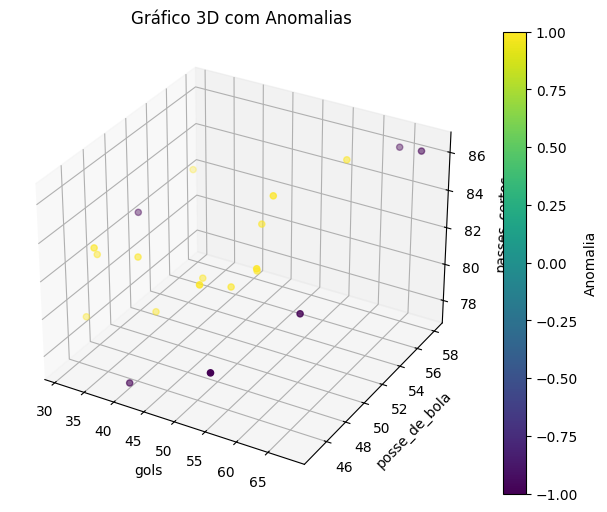

In [47]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Ajuste os valores das variáveis conforme necessário
x = df_fut['gols']
y = df_fut['posse_de_bola']
z = df_fut['passes_certos']

# Scatter plot 3D
scatter = ax.scatter(x, y, z, c=df_fut['anomaly'], cmap='viridis')

# Adicionando rótulos e título
ax.set_xlabel('gols')
ax.set_ylabel('posse_de_bola')
ax.set_zlabel('passes_certos')
ax.set_title('Gráfico 3D com Anomalias')

# Adicionando uma barra de cores para representar 'anomaly'
fig.colorbar(scatter, label='Anomalia', orientation='vertical')

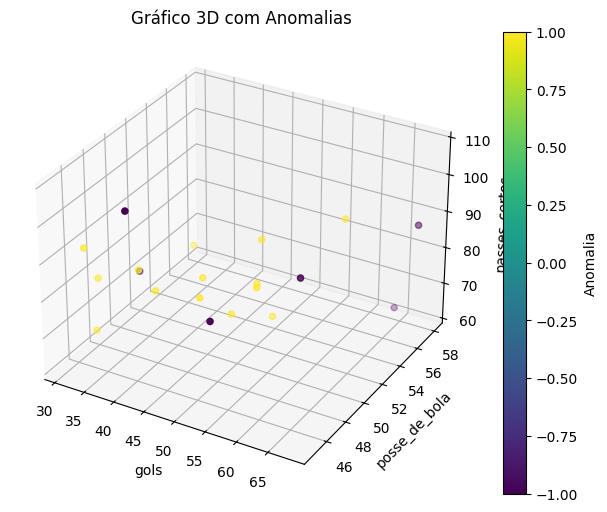

In [48]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Ajuste os valores das variáveis conforme necessário
x = df_fut['gols']
y = df_fut['posse_de_bola']
z = df_fut['cartao_amarelo']

# Scatter plot 3D
scatter = ax.scatter(x, y, z, c=df_fut['anomaly'], cmap='viridis')

# Adicionando rótulos e título
ax.set_xlabel('gols')
ax.set_ylabel('posse_de_bola')
ax.set_zlabel('passes_certos')
ax.set_title('Gráfico 3D com Anomalias')

# Adicionando uma barra de cores para representar 'anomaly'
fig.colorbar(scatter, label='Anomalia', orientation='vertical')

In [7]:
df_well = pd.read_csv("data/well_dataset.csv")

df_well.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20954 entries, 0 to 20953
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DEPT                               20954 non-null  float64
 1   FORCE_2020_LITHOFACIES_CONFIDENCE  20954 non-null  float64
 2   FORCE_2020_LITHOFACIES_LITHOLOGY   20954 non-null  float64
 3   CALI                               20954 non-null  float64
 4   BS                                 20954 non-null  float64
 5   DCAL                               20954 non-null  float64
 6   MUDWEIGHT                          20954 non-null  float64
 7   ROP                                20954 non-null  float64
 8   RDEP                               20954 non-null  float64
 9   RSHA                               20954 non-null  float64
 10  RMED                               20954 non-null  float64
 11  RXO                                20954 non-null  flo

In [20]:
inputs = ['NPHI', 'RHOB']

In [21]:
model_well = IsolationForest(contamination = 0.2, random_state = 42)

In [22]:
model_well.fit(df_well[inputs])

IsolationForest(contamination=0.2, random_state=42)

In [23]:
df_well['anomaly_scores'] = model_well.decision_function(df_well[inputs])

In [24]:
df_well['anomaly'] = model_well.predict(df_well[inputs])

Text(0.5, 1.0, 'Inliers\n19977 points')

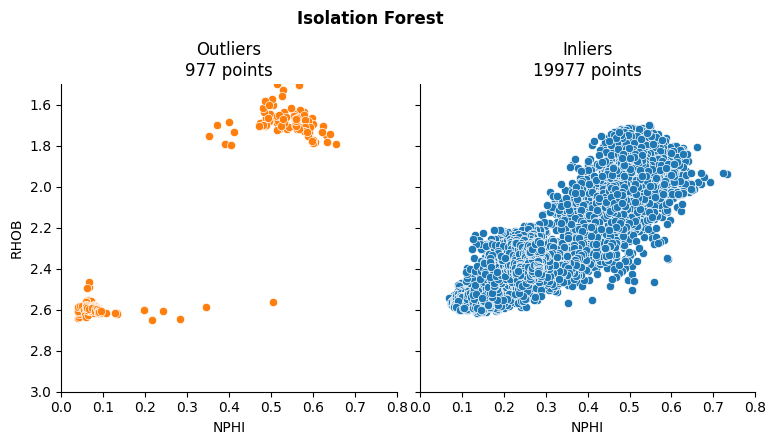

In [25]:
g = sns.FacetGrid(df_well, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
g.map(sns.scatterplot, 'NPHI', 'RHOB')
g.fig.suptitle('Isolation Forest', y=1.10, fontweight='bold')
g.set(xlim=[0,0.8], ylim=[3,1.5])
axes = g.axes.flatten()
axes[0].set_title(f"Outliers\n{len(df_well[df_well['anomaly'] == -1])} points")
axes[1].set_title(f"Inliers\n{len(df_well[df_well['anomaly'] == 1])} points")

In [5]:
inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']

In [15]:
model_well_6 = IsolationForest(contamination = 0.2, random_state = 42)

In [16]:
model_well_6.fit(df_well[inputs])

IsolationForest(contamination=0.2, random_state=42)

In [17]:
df_well['anomaly_scores'] = model_well_6.decision_function(df_well[inputs])

In [18]:
df_well['anomaly'] = model_well_6.predict(df_well[inputs])

Text(0.5, 1.0, 'Inliers\n16763 points')

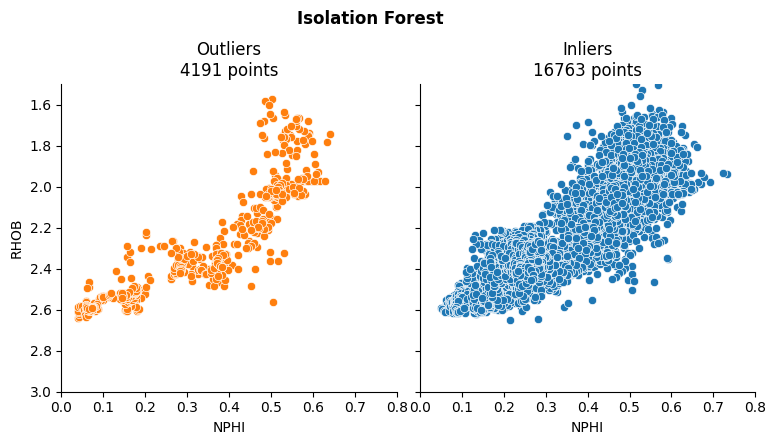

In [19]:
g = sns.FacetGrid(df_well, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
g.map(sns.scatterplot, 'NPHI', 'RHOB')
g.fig.suptitle('Isolation Forest', y=1.10, fontweight='bold')
g.set(xlim=[0,0.8], ylim=[3,1.5])
axes = g.axes.flatten()
axes[0].set_title(f"Outliers\n{len(df_well[df_well['anomaly'] == -1])} points")
axes[1].set_title(f"Inliers\n{len(df_well[df_well['anomaly'] == 1])} points")

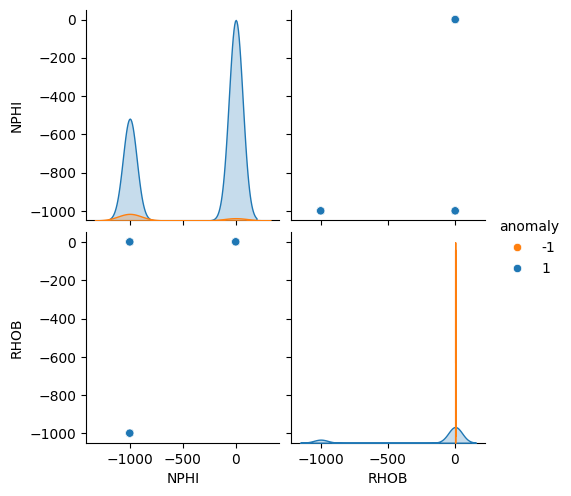

In [26]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_well, vars=inputs, hue='anomaly', palette = palette)